In [5]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df = pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [9]:
df.shape

(12976, 28)

In [10]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [11]:
df[df['essay_set']==7]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
10684,17834,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10685,17836,7,"I am not a patience person, like I cant sit i...",6,7,NaN,13,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10686,17837,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10687,17838,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,17839,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,19558,7,One time I was getting a cool @CAPS1 game it w...,6,6,NaN,12,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12249,19559,7,A patent person in my life is my mom. Aicason ...,9,7,NaN,16,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12250,19561,7,A time when someone else I know was patient wa...,11,8,NaN,19,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12251,19562,7,I hate weddings. I love when people get marrie...,12,10,NaN,22,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop columns which contain Missing values

In [12]:
df.dropna(axis=1,inplace=True)

In [13]:
df.isnull().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
domain1_score     0
dtype: int64

In [14]:
df.shape

(12976, 6)

In [15]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [16]:
df['essay_set'].value_counts()

5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

### Drop rater1_domain1 and rater2_domain1

In [17]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [18]:
df.shape

(12976, 4)

In [19]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [21]:
min(df['domain1_score'])

0

Have a Max value of 60

In [22]:
max(df['domain1_score'])

60

In [23]:
df.skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
dtype: float64

In [24]:
df.kurtosis()

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

/tmp/ipykernel_195/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

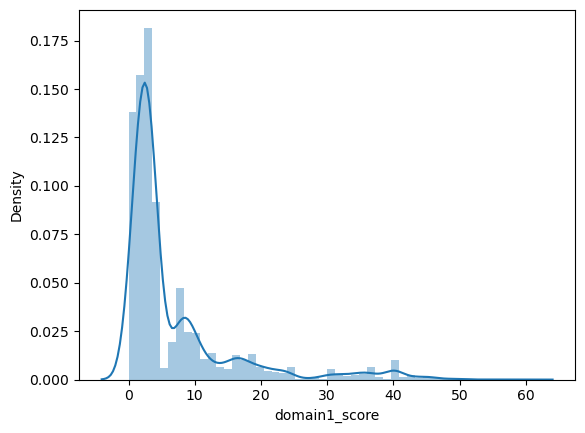

In [25]:
sns.distplot(df['domain1_score'])

In [26]:
df[df['essay_set']==2]['domain1_score']

1783    4
1784    1
1785    2
1786    4
1787    4
       ..
3578    3
3579    3
3580    2
3581    3
3582    3
Name: domain1_score, Length: 1800, dtype: int64

### Get the Max value and Min value of Each Essay set and form the min_range and max range array

In [27]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
#     print("min range =",mi)
#     print("max range =",ma)
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [28]:
df['final_score']

0        6
1        7
2        5
3        8
4        6
        ..
12971    6
12972    5
12973    7
12974    7
12975    7
Name: final_score, Length: 12976, dtype: int64

In [29]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


/tmp/ipykernel_195/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

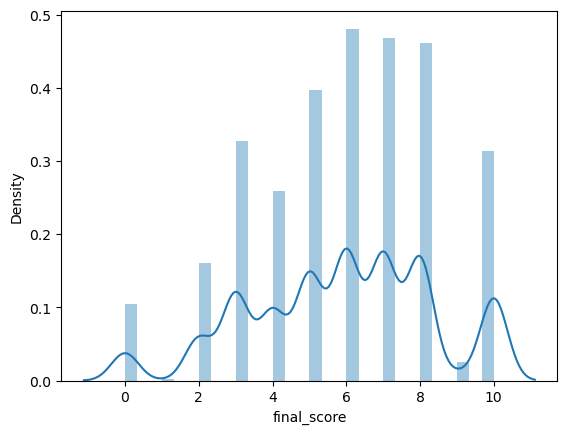

In [30]:
sns.distplot(df['final_score'])

In [26]:
df.skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
final_score     -0.248956
dtype: float64

In [31]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


In [32]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,5.849877
std,6309.074105,2.136913,8.970705,2.466040
min,1.000000,1.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,4.000000
50%,10044.500000,4.000000,3.000000,6.000000
75%,15681.250000,6.000000,8.000000,8.000000
max,21633.000000,8.000000,60.000000,10.000000


In [33]:
df.drop('domain1_score',axis=1,inplace=True)

In [34]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


## PRE PROCESSING

In [35]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [36]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,Dear I believe that using computers will benef...,7
2,3,1,"Dear, More and more people use computers, but ...",5
3,4,1,"Dear Local Newspaper, I have found that many e...",8
4,5,1,Dear I know having computers has a positive ef...,6


In [37]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/shehan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/shehan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Before removing stopwords
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the

In [39]:
word_tokenize(df['essay'][0])

['Dear',
 'local',
 'newspaper',
 ',',
 'I',
 'think',
 'effects',
 'computers',
 'have',
 'on',
 'people',
 'are',
 'great',
 'learning',
 'skills/affects',
 'because',
 'they',
 'give',
 'us',
 'time',
 'to',
 'chat',
 'with',
 'friends/new',
 'people',
 ',',
 'helps',
 'us',
 'learn',
 'about',
 'the',
 'globe',
 '(',
 'astronomy',
 ')',
 'and',
 'keeps',
 'us',
 'out',
 'of',
 'troble',
 '!',
 'Thing',
 'about',
 '!',
 'Dont',
 'you',
 'think',
 'so',
 '?',
 'How',
 'would',
 'you',
 'feel',
 'if',
 'your',
 'teenager',
 'is',
 'always',
 'on',
 'the',
 'phone',
 'with',
 'friends',
 '!',
 'Do',
 'you',
 'ever',
 'time',
 'to',
 'chat',
 'with',
 'your',
 'friends',
 'or',
 'buisness',
 'partner',
 'about',
 'things',
 '.',
 'Well',
 'now',
 '-',
 'there',
 "'s",
 'a',
 'new',
 'way',
 'to',
 'chat',
 'the',
 'computer',
 ',',
 'theirs',
 'plenty',
 'of',
 'sites',
 'on',
 'the',
 'internet',
 'to',
 'do',
 'so',
 ':',
 'facebook',
 ',',
 'myspace',
 'ect',
 '.',
 'Just',
 'think',

In [40]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [41]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [43]:
# After removing stopwords
df['clean_essay'][0]

"Dear local newspaper , I think effects computers people great learning skills/affects give us time chat friends/new people , helps us learn globe ( astronomy ) keeps us troble ! Thing ! Dont think ? How would feel teenager always phone friends ! Do ever time chat friends buisness partner things . Well - 's new way chat computer , plenty sites internet : facebook , myspace ect . Just think setting meeting boss computer , teenager fun phone rushing get cause want use . How learn countrys/states outside ? Well I computer/internet , 's new way learn going time ! You might think child spends lot time computer , ask question economy , sea floor spreading even 'll surprise much he/she knows . Believe computer much interesting class day reading books . If child home computer local library , 's better friends fresh , perpressured something know isnt right . You might know child , forbidde hospital bed drive-by . Rather child computer learning , chatting playing games , safe sound home communit

In [44]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [45]:
# After removing punctuation marks
df['clean_essay'][0]

'Dear local newspaper  I think effects computers people great learning skillsaffects give us time chat friendsnew people  helps us learn globe  astronomy  keeps us troble  Thing  Dont think  How would feel teenager always phone friends  Do ever time chat friends buisness partner things  Well  s new way chat computer  plenty sites internet  facebook  myspace ect  Just think setting meeting boss computer  teenager fun phone rushing get cause want use  How learn countrysstates outside  Well I computerinternet  s new way learn going time  You might think child spends lot time computer  ask question economy  sea floor spreading even ll surprise much heshe knows  Believe computer much interesting class day reading books  If child home computer local library  s better friends fresh  perpressured something know isnt right  You might know child  forbidde hospital bed driveby  Rather child computer learning  chatting playing games  safe sound home community place  Now I hope reached point unders

In [46]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [37]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count

In [38]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...
